In [1]:
import numpy
import pandas as pd

In [2]:
df = pd.read_csv('modified_placement_data.csv')

In [3]:
df.head()

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No


In [4]:
import matplotlib.pyplot as plt

In [5]:
df['cgpa'] = df['cgpa'].str.replace(',', '.').astype(float)

In [6]:
df['placement'] = df['placement'].map({'Yes': 1, 'No': 0})

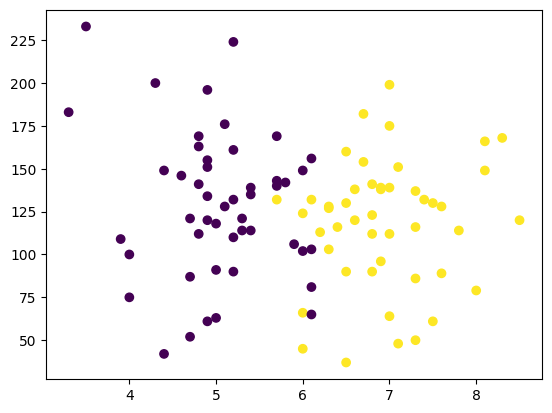

In [7]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

In [8]:
 X = df.iloc[:,0:2]
 Y = df.iloc[:,-1]

In [9]:
Y.shape
X.shape

(100, 2)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_train

array([[ 0.79201969,  0.36618887],
       [ 0.45329429,  0.9080827 ],
       [ 1.3001078 , -1.53043957],
       [ 1.1307451 , -0.17570497],
       [ 1.9775586 ,  1.10513501],
       [-1.66373948, -1.18559803],
       [-0.90160732, -1.53043957],
       [ 0.87670104, -0.27423112],
       [-1.07097003, -1.75212341],
       [ 0.53797564, -0.07717882],
       [ 0.87670104, -1.45654495],
       [-0.73224462,  1.30218731],
       [ 0.28393159,  0.11987349],
       [ 0.70733834, -0.27423112],
       [ 0.96138239, -1.85064956],
       [-2.08714624,  2.70618499],
       [ 0.11456889, -1.43191341],
       [-0.98628867, -0.27423112],
       [-2.25650894,  1.47460808],
       [ 0.28393159, -0.49591497],
       [-0.22415652,  0.21839964],
       [-0.81692597, -0.79149342],
       [-0.56288192, -0.22496805],
       [ 0.87670104,  1.27755578],
       [-0.98628867,  1.12976655],
       [-1.32501408,  0.63713579],
       [        nan, -0.39738881],
       [-0.64756327,  0.21839964],
       [-1.40969543,

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_test

array([[-1.07097003, -0.89001958],
       [-0.47820057,  0.29229425],
       [-0.05479382, -0.42202035],
       [ 0.87670104,  1.86871269],
       [ 0.02988754,  0.63713579],
       [ 0.53797564,  0.36618887],
       [ 1.38478915,  0.11987349],
       [ 0.70733834, -0.81612496],
       [-0.47820057, -0.22496805],
       [ 0.45329429,  0.16913656]])

In [19]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf = LogisticRegression()

In [23]:
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test with the column mean

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [24]:
clf.fit(X_train, Y_train)

LogisticRegression()

In [27]:
Y_pred = clf.predict(X_test)

In [28]:
Y_test

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(Y_pred, Y_test)

0.9

In [36]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from mlxtend.plotting import plot_decision_regions
 

<Axes: >

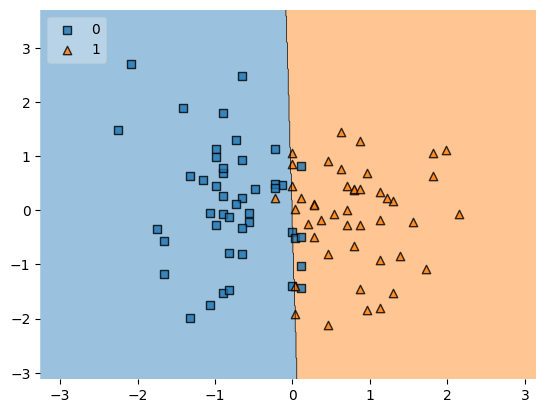

In [43]:
plot_decision_regions(X_train, Y_train, clf=clf, legend=2)

In [44]:
import pickle

In [45]:
pickle.dump(clf,open('model.pkl', 'wb'))